In [ ]:
import pandas as pd
df = pd.read_csv('/content/house-prices.csv')
display(df)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Unnamed: 8,Location
0,1,114300,1790,2,2,2,No,East,NaN,Urban
1,2,114200,2030,4,2,3,No,East,NaN,Urban
2,3,114800,1740,3,2,1,No,East,NaN,Urban
3,4,94700,1980,3,2,3,No,East,NaN,Urban
4,5,119800,2130,3,3,3,No,East,NaN,Urban
...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East,NaN,Suburban
124,125,147900,2160,4,3,3,Yes,East,NaN,Suburban
125,126,113500,2070,2,2,2,No,North,NaN,Suburban
126,127,149900,2020,3,3,1,No,West,NaN,Suburban


In [ ]:
# Analyze distributions of numerical variables
# Identify potential outliers that might skew results.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)


Missing Values:
 Home              0
Price             0
SqFt              0
Bedrooms          0
Bathrooms         0
Offers            0
Brick             0
Neighborhood      0
Unnamed: 8      128
Location          0
dtype: int64


<ipython-input-9-d58691c363ba>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean


In [ ]:
# range using methods like Min-Max Scaling or Standardization.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

if 'Id' in numerical_features:
    numerical_features = numerical_features.drop('Id')
df[numerical_features] = scaler.fit_transform(df[numerical_features])
display(df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Unnamed: 8,Location
0,0.000000,0.318086,0.298246,0.000000,0.0,0.2,No,East,NaN,Urban
1,0.007874,0.317382,0.508772,0.666667,0.0,0.4,No,East,NaN,Urban
2,0.015748,0.321605,0.254386,0.333333,0.0,0.0,No,East,NaN,Urban
3,0.023622,0.180155,0.464912,0.333333,0.0,0.4,No,East,NaN,Urban
4,0.031496,0.356791,0.596491,0.333333,0.5,0.4,No,East,NaN,Urban
...,...,...,...,...,...,...,...,...,...,...
123,0.968504,0.356087,0.394737,0.333333,0.5,0.4,Yes,East,NaN,Suburban
124,0.976378,0.554539,0.622807,0.666667,0.5,0.4,Yes,East,NaN,Suburban
125,0.984252,0.312456,0.543860,0.000000,0.0,0.2,No,North,NaN,Suburban
126,0.992126,0.568614,0.500000,0.333333,0.5,0.0,No,West,NaN,Suburban


In [ ]:
# One-Hot Encoding for non-ordinal categories.
#  Label Encoding for ordinal categories

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_location = encoder.fit_transform(df[['Location']])
encoded_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['Location']))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop('Location', axis=1)
display(df)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Unnamed: 8,Location_Rural,Location_Suburban,Location_Urban
0,0.000000,0.318086,0.298246,0.000000,0.0,0.2,No,East,NaN,0.0,0.0,1.0
1,0.007874,0.317382,0.508772,0.666667,0.0,0.4,No,East,NaN,0.0,0.0,1.0
2,0.015748,0.321605,0.254386,0.333333,0.0,0.0,No,East,NaN,0.0,0.0,1.0
3,0.023622,0.180155,0.464912,0.333333,0.0,0.4,No,East,NaN,0.0,0.0,1.0
4,0.031496,0.356791,0.596491,0.333333,0.5,0.4,No,East,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.968504,0.356087,0.394737,0.333333,0.5,0.4,Yes,East,NaN,0.0,1.0,0.0
124,0.976378,0.554539,0.622807,0.666667,0.5,0.4,Yes,East,NaN,0.0,1.0,0.0
125,0.984252,0.312456,0.543860,0.000000,0.0,0.2,No,North,NaN,0.0,1.0,0.0
126,0.992126,0.568614,0.500000,0.333333,0.5,0.0,No,West,NaN,0.0,1.0,0.0


Correlation with Price:
 Home                 0.108190
Price                1.000000
SqFt                 0.552982
Bedrooms             0.525926
Bathrooms            0.523258
Offers              -0.313636
Unnamed: 8                NaN
Location_Rural      -0.066585
Location_Suburban    0.024632
Location_Urban       0.047680
Name: Price, dtype: float64

DataFrame after removing low-impact predictors:


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Unnamed: 8
0,0.000000,0.318086,0.298246,0.000000,0.0,0.2,NaN
1,0.007874,0.317382,0.508772,0.666667,0.0,0.4,NaN
2,0.015748,0.321605,0.254386,0.333333,0.0,0.0,NaN
3,0.023622,0.180155,0.464912,0.333333,0.0,0.4,NaN
4,0.031496,0.356791,0.596491,0.333333,0.5,0.4,NaN
...,...,...,...,...,...,...,...
123,0.968504,0.356087,0.394737,0.333333,0.5,0.4,NaN
124,0.976378,0.554539,0.622807,0.666667,0.5,0.4,NaN
125,0.984252,0.312456,0.543860,0.000000,0.0,0.2,NaN
126,0.992126,0.568614,0.500000,0.333333,0.5,0.0,NaN


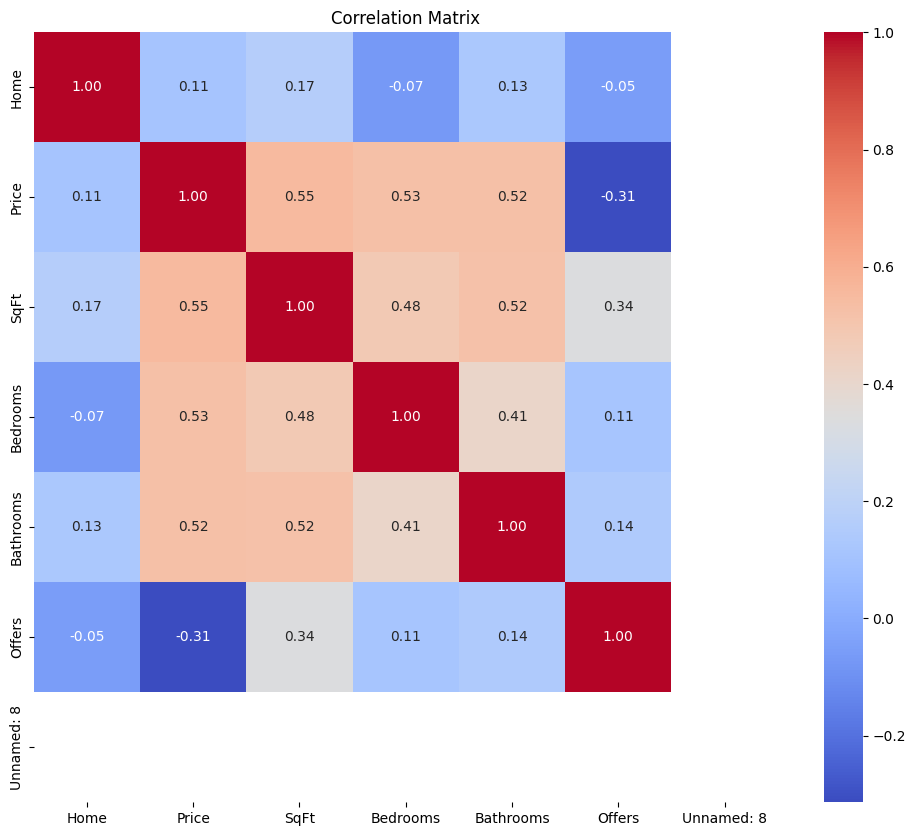

In [ ]:
# correlation analysis to identify relationships between features and the target variable (Price).

for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        df = df.drop(columns=[col])
correlations = df.corr()['Price']
print("Correlation with Price:\n", correlations)
threshold = 0.1
low_impact_predictors = correlations[abs(correlations) < threshold].index

df = df.drop(columns=low_impact_predictors)
print("\nDataFrame after removing low-impact predictors:")
display(df)

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Ensure the split is random but reproducible.

from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (102, 6)
X_test shape: (26, 6)
y_train shape: (102,)
y_test shape: (26,)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

X_train shape: (102, 5)
X_test shape: (26, 5)
y_train shape: (102,)
y_test shape: (26,)
Mean Squared Error: 0.012615545443808914
R-squared: 0.5677998888921291


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 8']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 8']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
